In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [9]:
## Combined Indexing
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[2, [2, 0, 1]] #combine fancy and simple indicies

array([10,  8,  9])

In [11]:
X[1:, [2, 0, 1]] #comibed fincy indexing with slicng

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool) #indexong with masking
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [13]:
### Example selecting random point
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

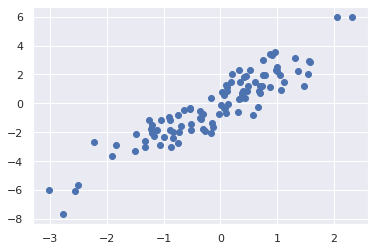

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [15]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([34, 20, 88, 30, 16, 62, 22, 36, 78, 39,  8, 23, 12, 58,  5, 84, 47,
       77,  7, 40])

In [16]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

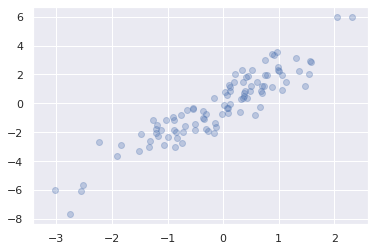

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', s=200);

In [18]:
## Modifying values with fnacy Indexing
X = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[51 99 99 71 99 20 82 86 99 74]


In [20]:
x[i] -= 10
print(x)

[51 79 79 71 79 20 82 86 79 74]


In [22]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
i = [2, 3, 3, 4, 4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [25]:
x = np.zeros(10)
np.add.at(x, i,1)
print(x)


[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [28]:
## Example
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropiate bin for each X
i = np.searchsorted(bins, x)

# Add one to each of this been files
np.add.at(counts, i, 1)

/home/mitch/projects/Geospatial/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


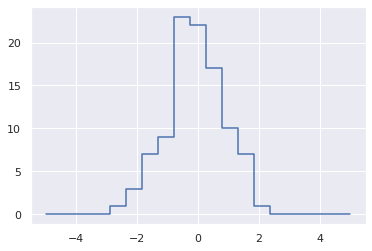

In [29]:
# Plot the results
plt.plot(bins, counts, linestyle='steps');

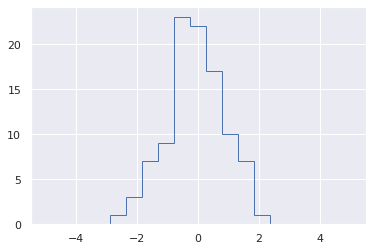

In [30]:
plt.hist(x, bins, histtype='step');

In [31]:
print('Numpy routine:')
%timeit counts, edges = np.histogram(x, bins)

Numpy routine:
24.8 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
print("Custom routine")
%time np.add.at(counts, np.searchsorted(bins, x), 1)

Custom routine
CPU times: user 204 µs, sys: 39 µs, total: 243 µs
Wall time: 196 µs
